In [155]:
import pandas as pd
import numpy as np

In [2]:
load_df = pd.read_csv('loan_prediction.csv')

In [3]:
load_df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [5]:
load_df= load_df.drop('Loan_ID',axis=1)

In [6]:
load_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
load_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling missing values

In [21]:
load_df['Gender'].fillna(load_df['Gender'].mode()[0], inplace=True)
load_df['Married'].fillna(load_df['Married'].mode()[0], inplace=True)
load_df['Dependents'].fillna(load_df['Dependents'].mode()[0], inplace=True)
load_df['Self_Employed'].fillna(load_df['Self_Employed'].mode()[0], inplace=True)

In [22]:
load_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
load_df['LoanAmount'].fillna(load_df['LoanAmount'].median(), inplace=True)
load_df['Loan_Amount_Term'].fillna(load_df['Loan_Amount_Term'].mode()[0], inplace=True)
load_df['Credit_History'].fillna(load_df['Credit_History'].mode()[0], inplace=True)

In [24]:
load_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

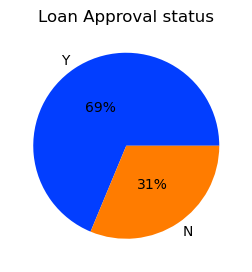

In [49]:
palette_color = sns.color_palette('bright')
loan_status_count = load_df['Loan_Status'].value_counts()
labels = loan_status_count.index
plt.figure(figsize=(3,6))
plt.title('Loan Approval status')
plt.pie(loan_status_count,colors =palette_color,labels=labels,autopct='%1.0f%%',pctdistance=0.5)
plt.show()

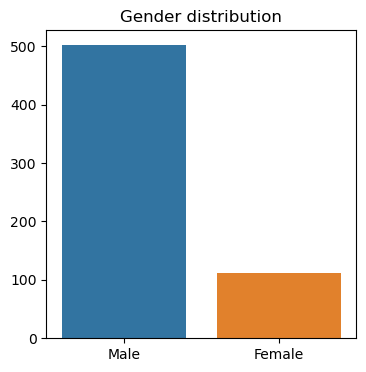

In [59]:
gender_count = load_df['Gender'].value_counts()
plt.figure(figsize=(4,4))
plt.title('Gender distribution')
sns.barplot(x=gender_count.index,y=gender_count.values)
plt.show()

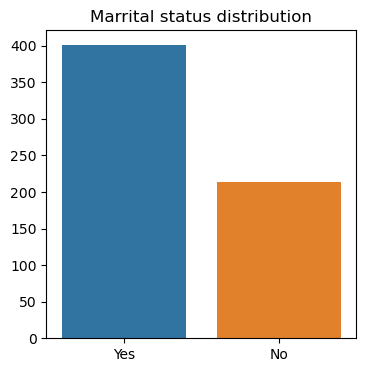

In [60]:
marrital_count = load_df['Married'].value_counts()
plt.figure(figsize=(4,4))
plt.title('Marrital status distribution')
sns.barplot(x=marrital_count.index,y=marrital_count.values)
plt.show()

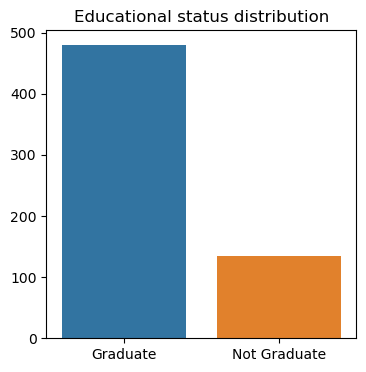

In [61]:
educational_status_count = load_df['Education'].value_counts()
plt.figure(figsize=(4,4))
plt.title('Educational status distribution')
sns.barplot(x=educational_status_count.index,y=educational_status_count.values)
plt.show()

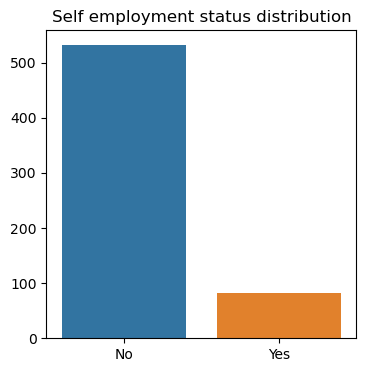

In [62]:
self_emp_count = load_df['Self_Employed'].value_counts()
plt.figure(figsize=(4,4))
plt.title('Self employment status distribution')
sns.barplot(x=self_emp_count.index,y=self_emp_count.values)
plt.show()

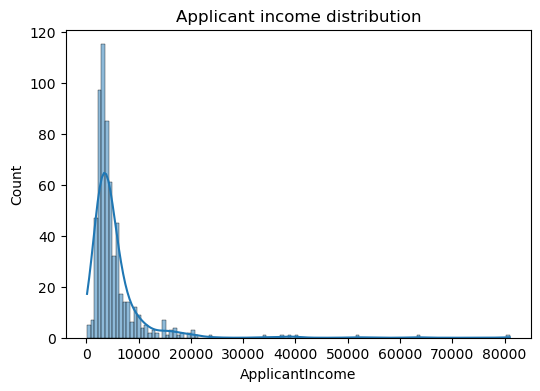

In [72]:
plt.figure(figsize=(6,4))
plt.title('Applicant income distribution')
sns.histplot(data=load_df,x='ApplicantIncome',kde=True)
plt.show()

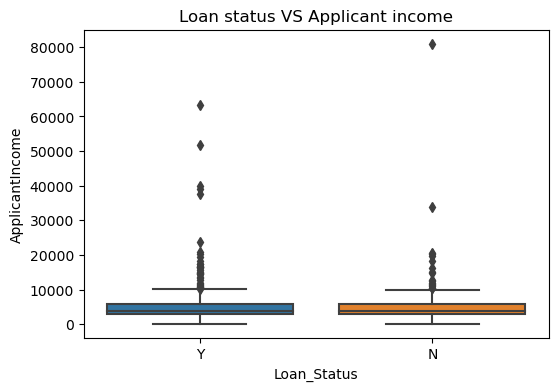

In [74]:
plt.figure(figsize=(6,4))
plt.title('Loan status VS Applicant income')
sns.boxplot(data=load_df,x='Loan_Status',y='ApplicantIncome')
plt.show()

Outlier removal

In [83]:
Q1= load_df['ApplicantIncome'].quantile(0.25)
Q3= load_df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

load_df = load_df [(load_df['ApplicantIncome']>= lower_bound) & (load_df['ApplicantIncome']<=upper_bound)]

Post outlier removal

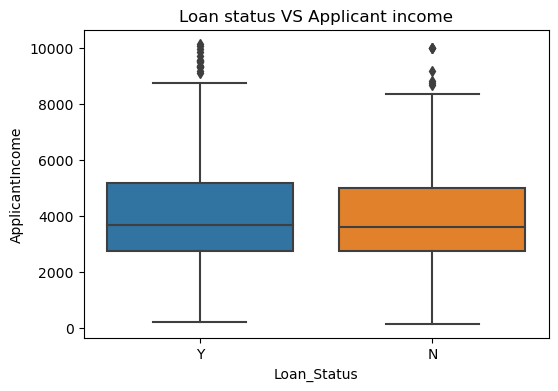

In [84]:
plt.figure(figsize=(6,4))
plt.title('Loan status VS Applicant income')
sns.boxplot(data=load_df,x='Loan_Status',y='ApplicantIncome')
plt.show()

Coapplicant income vs loan status

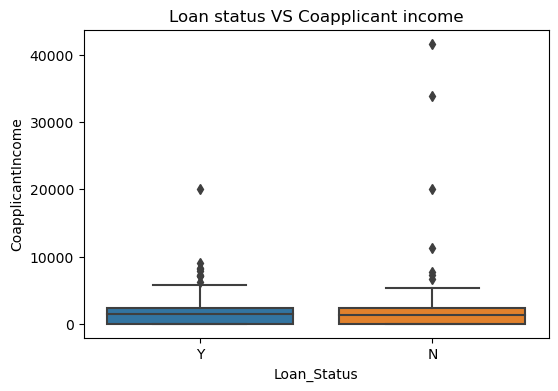

In [85]:
plt.figure(figsize=(6,4))
plt.title('Loan status VS Coapplicant income')
sns.boxplot(data=load_df,x='Loan_Status',y='CoapplicantIncome')
plt.show()

CoapplicantIncome outlier removal

In [86]:
Q1 = load_df['CoapplicantIncome'].quantile(0.25)
Q3 = load_df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

load_df = load_df[(load_df['CoapplicantIncome']>=lower_bound) & (load_df['CoapplicantIncome'] <= upper_bound)]

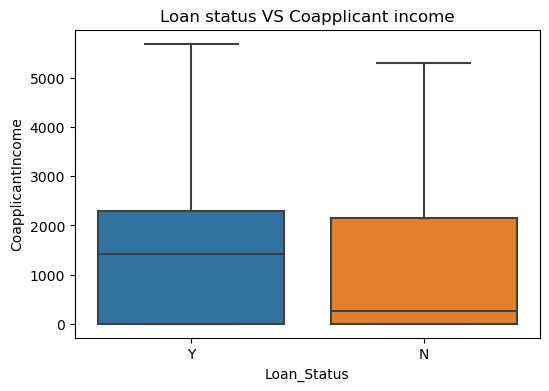

In [87]:
plt.figure(figsize=(6,4))
plt.title('Loan status VS Coapplicant income')
sns.boxplot(data=load_df,x='Loan_Status',y='CoapplicantIncome')
plt.show()

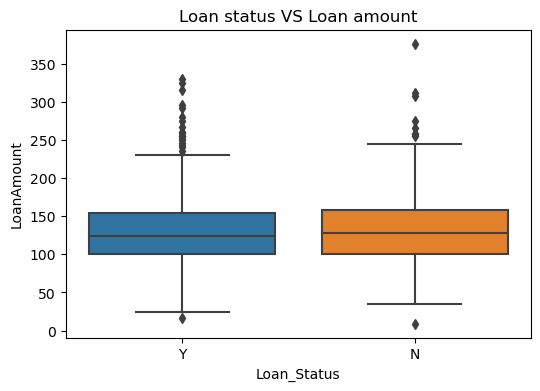

In [88]:
plt.figure(figsize=(6,4))
plt.title('Loan status VS Loan amount')
sns.boxplot(data=load_df,x='Loan_Status',y='LoanAmount')
plt.show()

<Axes: xlabel='Credit_History'>

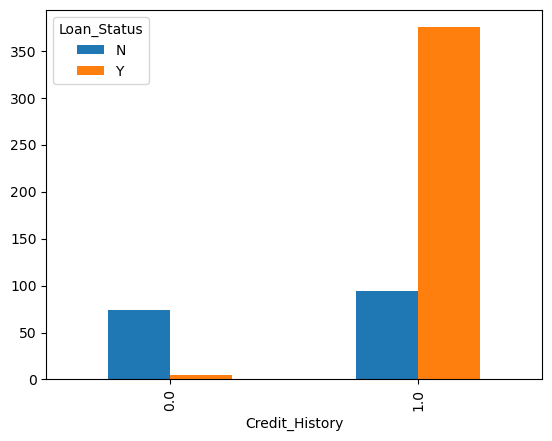

In [152]:
df_1 = pd.crosstab(load_df['Credit_History'],load_df['Loan_Status'])
#df_1
df_1.plot.bar()

<Axes: xlabel='Property_Area'>

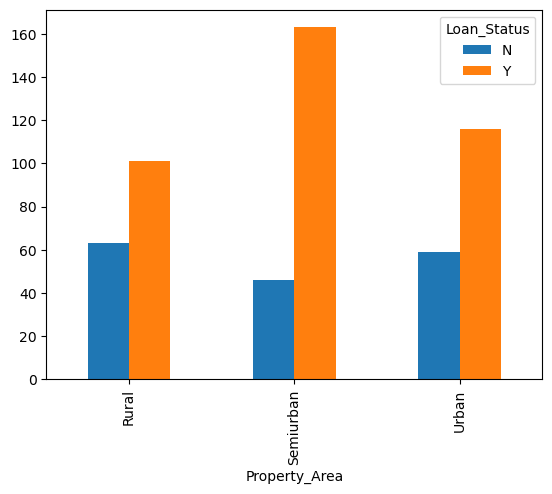

In [153]:
df_2 = pd.crosstab(load_df['Property_Area'],load_df['Loan_Status'])
#df_1
df_2.plot.bar()

In [154]:
catg_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
load_df = pd.get_dummies(load_df,columns=catg_cols)
load_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
